In [1]:
# Import import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Import dataset
car = pd.read_csv("CarPrice_Dataset.csv", encoding ='UTF-8')

In [3]:
# Converting all column headers to lowercase
car.columns = car.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(car.head(),"\n")
print(car.shape)

   car_id  symboling                   carname fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Check if any null value exists
car.isnull().sum()

car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# Selecting columns which are not visible in the above screen
car.loc[:,'wheelbase':'enginesize'].sample(n=5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize
25,93.7,157.3,63.8,50.6,1989,ohc,four,90
181,104.5,187.8,66.5,54.1,3151,dohc,six,161
192,100.4,180.2,66.9,55.1,2579,ohc,four,97
92,94.5,165.3,63.8,54.5,1938,ohc,four,97
169,98.4,176.2,65.6,52.0,2551,ohc,four,146


In [6]:
# splitting car comany from carname and drop carname series 
car['carcompany']=car['carname'].str.split().str[0]
car = car.drop('carname', axis = 1)

In [7]:
car.sample(n=5)

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
112,113,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,...,idi,3.70,3.52,21.00,95,4150,28,33,16900.0,peugeot
73,74,0,gas,std,four,sedan,rwd,front,120.9,208.1,...,mpfi,3.80,3.35,8.00,184,4500,14,16,40960.0,buick
191,192,0,gas,std,four,sedan,fwd,front,100.4,180.2,...,mpfi,3.19,3.40,8.50,110,5500,19,24,13295.0,volkswagen
21,22,1,gas,std,two,hatchback,fwd,front,93.7,157.3,...,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.0,dodge
180,181,-1,gas,std,four,sedan,rwd,front,104.5,187.8,...,mpfi,3.27,3.35,9.20,156,5200,20,24,15690.0,toyota


In [8]:
# print unique car comany name suspecting incorrect company names
car['carcompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# Fixing correct car company name
car['carcompany'] = car['carcompany'].replace('maxda','mazda')
car['carcompany'] = car['carcompany'].replace('Nissan','nissan')
car['carcompany'] = car['carcompany'].replace('plymouth','peugeot')
car['carcompany'] = car['carcompany'].replace('porcshce','porsche')
car['carcompany'] = car['carcompany'].replace('toyouta','toyota')
car['carcompany'] = car['carcompany'].replace('vokswagen','volkswagen')
car['carcompany'] = car['carcompany'].replace('vw','volkswagen')

In [10]:
# Creating conditional column for symboling categorical variable based on data dictionary setting value 0 as moderate ,<0 'safe',>0 'risky'
conditions = [
    (car.symboling== -2),
    (car.symboling.between(-1,1)),
    (car.symboling.between(2,3))]
choices = ['lowrisk', 'mediumrisk', 'highrisk']
car['risk'] = np.select(conditions, choices)
car.risk.unique()
# drop column symboling
car = car.drop('symboling', axis = 1)

In [11]:
#Print unique values for all the attributes
print('risk :-',car.risk.unique(),"\n")
print('carcompany :-',car.carcompany.unique(),"\n")
print('fueltype :-',car.fueltype.unique(),"\n")
print('aspiration :-',car.aspiration.unique(),"\n")
print('doornumber :-',car.doornumber.unique(),"\n")
print('carbody :-',car.carbody.unique(),"\n")
print('drivewheel :-',car.drivewheel.unique(),"\n")
print('enginelocation :-',car.enginelocation.unique(),"\n")
print('enginetype :-',car.enginetype.unique(),"\n")
print('cylindernumber :-',car.cylindernumber.unique(),"\n")
print('fuelsystem :-',car.fuelsystem.unique(),"\n")

risk :- ['highrisk' 'mediumrisk' 'lowrisk'] 

carcompany :- ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 

fueltype :- ['gas' 'diesel'] 

aspiration :- ['std' 'turbo'] 

doornumber :- ['two' 'four'] 

carbody :- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drivewheel :- ['rwd' 'fwd' '4wd'] 

enginelocation :- ['front' 'rear'] 

enginetype :- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 

cylindernumber :- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 

fuelsystem :- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 



In [12]:
# counting engine type 
car.enginetype[car.enginetype == 'l'].count()

12

In [13]:
# Rounding off car price to 2 decimal places
car['price']= car['price'].round(2)

# Univariate Analysis on Unordered Categorical Variables

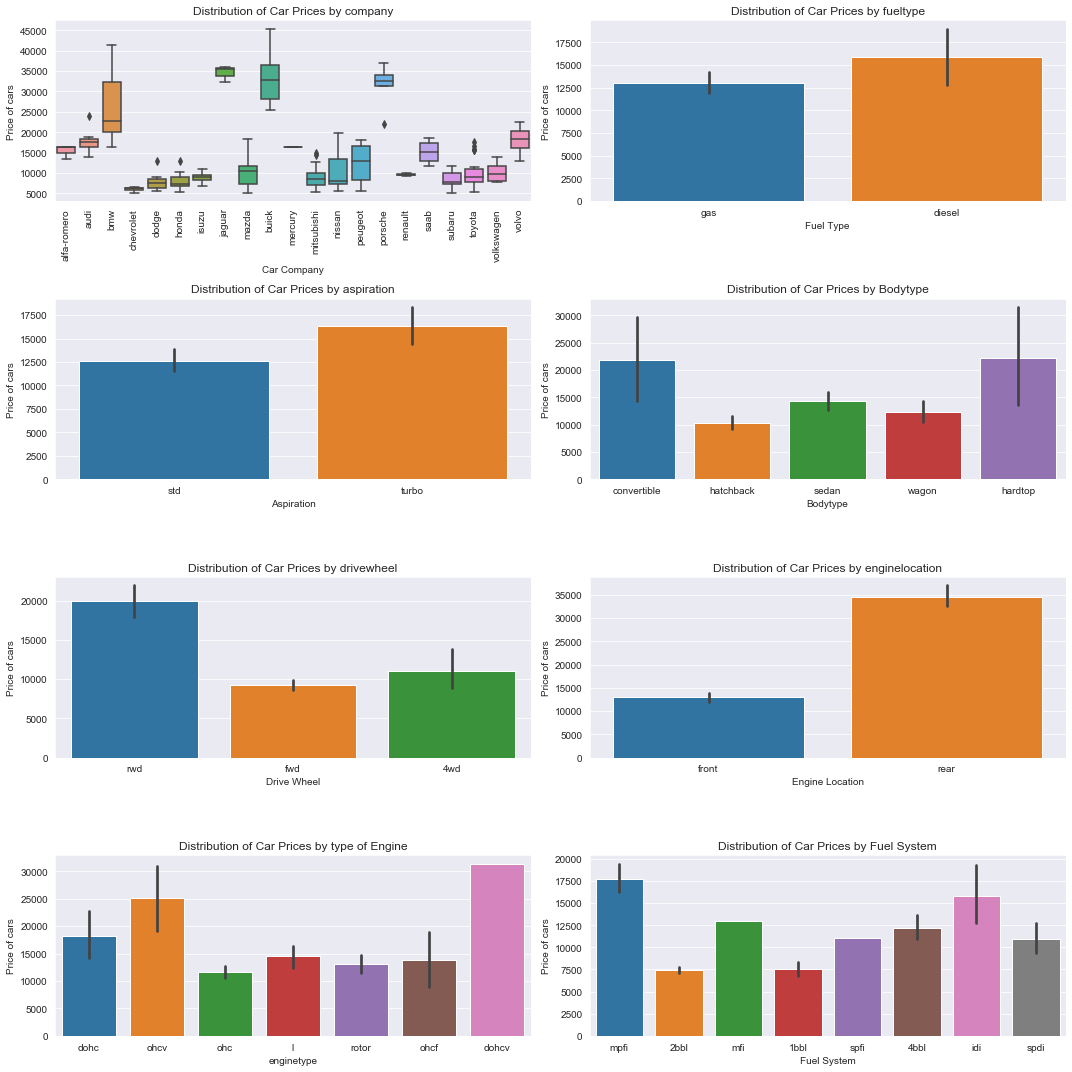

In [14]:
# Univariate Analysis on Unordered Categorical variables

#'carcompany','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'

plt.figure(figsize=(15,15))

plt.figure(1)

# Distribution of cars price by carcompany
plt.subplot(4,2,1)
sns.boxplot(x='carcompany',y='price', data=car)
plt.title('Distribution of Car Prices by company')
plt.xlabel("Car Company")
plt.ylabel("Price of cars")
# To rotate axis text
plt.xticks(rotation=90)

# Distribution of cars price by fueltype
plt.subplot(4,2,2)
sns.barplot(x='fueltype',y='price', data=car)
plt.title('Distribution of Car Prices by fueltype')
plt.xlabel("Fuel Type")
plt.ylabel("Price of cars")

# Distribution of cars price by aspiration
plt.subplot(4,2,3)
sns.barplot(x='aspiration',y='price', data=car)
plt.title('Distribution of Car Prices by aspiration')
plt.xlabel("Aspiration")
plt.ylabel("Price of cars")

# Distribution of car price by Term Month
plt.subplot(4,2,4)
sns.barplot(x='carbody',y='price', data=car)
plt.title('Distribution of Car Prices by Bodytype')
plt.xlabel("Bodytype")
plt.ylabel("Price of cars")

# Distribution of cars price by drivewheel
plt.subplot(4,2,5)
sns.barplot(x='drivewheel',y='price', data=car)
plt.title('Distribution of Car Prices by drivewheel')
plt.xlabel("Drive Wheel")
plt.ylabel("Price of cars")

# Distribution of cars price by enginelocation
plt.subplot(4,2,6)
sns.barplot(x='enginelocation',y='price', data=car)
plt.title('Distribution of Car Prices by enginelocation')
plt.xlabel("Engine Location")
plt.ylabel("Price of cars")

# Distribution of cars price by type of Engine
plt.subplot(4,2,7)
sns.barplot(x='enginetype',y='price', data=car)
plt.title('Distribution of Car Prices by type of Engine')
plt.xlabel("enginetype")
plt.ylabel("Price of cars")

# Distribution of cars price by fuelsystem
plt.subplot(4,2,8)
sns.barplot(x='fuelsystem',y='price', data=car)
plt.title('Distribution of Car Prices by Fuel System')
plt.xlabel("Fuel System")
plt.ylabel("Price of cars")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

Observation:

1) From this dataset it is been observed that most number of high prices cars are offered by Jaguar, Buick, Porsche and BMW.

2) Preffered fuel type is Diesel for high priced cars.

3) Turbo aspiration type is offered with high prices cars.

4) Sedan bodytype is top in offerings lineup followed by Hatchbck.

5) Expensive cars are ofered with Rear wheel drive.

6) Expensive cars have engines located at rear.

7) expensive cars offeered are mounted with 'dohcv'or 'ohcv' engine type.

8) when it comes to Fuel system 'mpfi' tops the list followed by 'idi' fuel system type .

9) There is something fishy with 'mfi' and 'spfi' since not confidence raton lineis visible with there barchart.lets investigate them.

Price of the car is definitely influenced by the brand name followed by fuel type, aspiration, drive wheel, engine location and type of engine being offered.

# Univariate analysis for Ordered Categorical variables

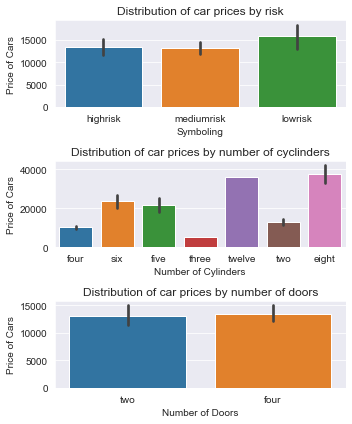

In [15]:
# Univariate Analysis on rest of the Unordered Categorical variables
#'risk','cylindernumber','doornumber'
plt.figure(figsize=(5,6))

plt.figure(1)

# Distribution of car prices by risk
plt.subplot(3,1,1)
sns.barplot(x='risk',y='price', data=car)
plt.title('Distribution of car prices by risk')
plt.xlabel("Symboling")
plt.ylabel("Price of Cars")

# Distribution of car prices by number of cyclinders
plt.subplot(3,1,2)
sns.barplot(x='cylindernumber',y='price', data=car)
plt.title('Distribution of car prices by number of cyclinders')
plt.xlabel("Number of Cylinders")
plt.ylabel("Price of Cars")

# Distribution of car prices by Home Ownership
plt.subplot(3,1,3)
sns.barplot(x='doornumber',y='price', data=car)
plt.title('Distribution of car prices by number of doors')
plt.xlabel("Number of Doors")
plt.ylabel("Price of Cars")


# To adjust spacing between subplots
plt.tight_layout()
plt.show()

Observation:

1) expensive cars are considered more secure from Symboling (insurance risk factor) point of view.

2) Eight Cyliner cars falls into high price bracket.

3) Number of doors does not contribute much towards pricing of car.

# Univariate Analysis for Quantitative variables

In [16]:
# Let's print descriptive data summary for all numerical columns
print(car[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']].describe())

        wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.0000

# Bivariate Analysis on Continuous Variables

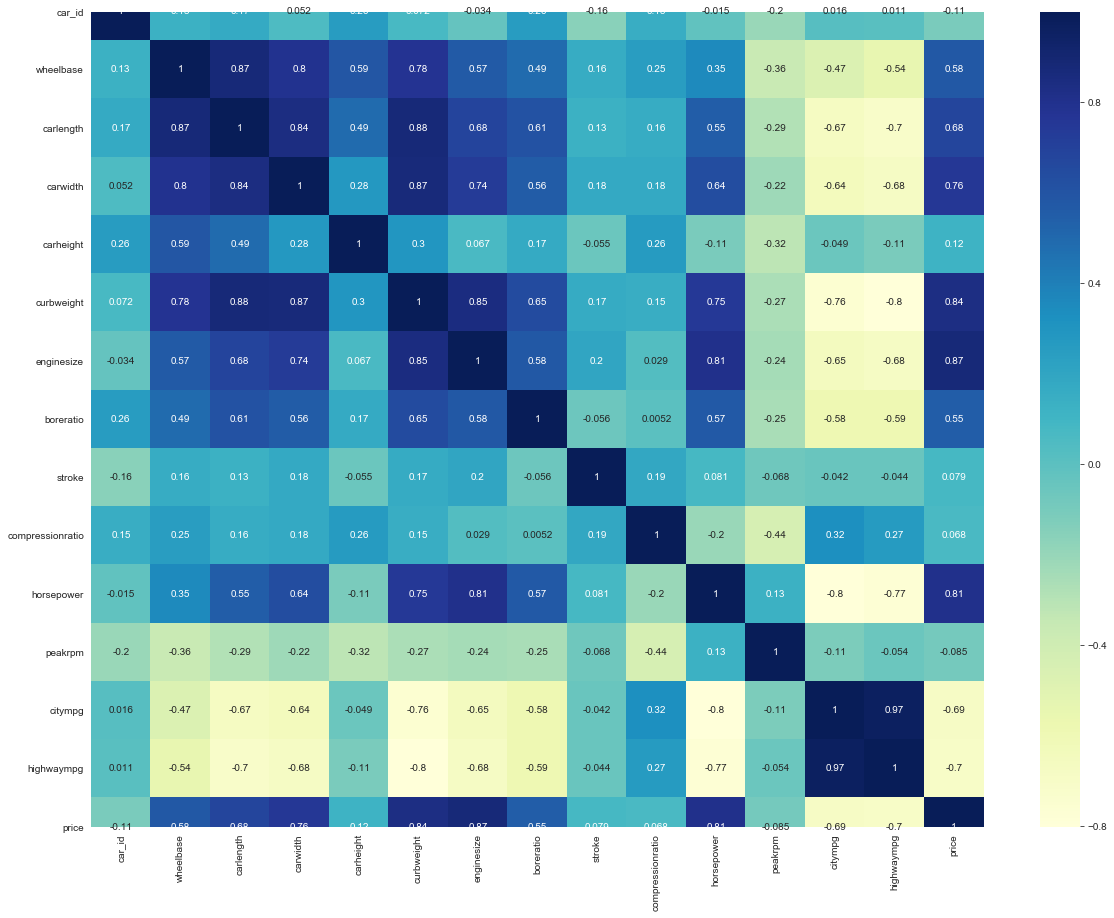

In [17]:
# Correlation Plot
cor = car.corr()
round(cor,3)
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

From above plot it is evident that :-

1) There is not much negative correlaton in there.

2) There is positive correlation between price, curbweight,enginesize,horsepower,carwidth,carlength,wheelbase and boreratio.

3) There is negative corelation between price, highwaympg,peakrpm and citympg.

4) carheight, stroke and compression ration has got negligible corelation.


# Data Prepration

In [18]:
# Creating dummy variable for variable risk and dropping the first one
riskfactor = pd.get_dummies(car['risk'],drop_first=True)
#Adding the results to the master dataframe
car = pd.concat([car,riskfactor],axis=1)
# Dropping risk as we have created the dummies for it
car.drop(['risk'],axis=1,inplace=True)

# Repeating same steps for carcompany variable
carcompany = pd.get_dummies(car['carcompany'],drop_first=True)
car = pd.concat([car,carcompany],axis=1)
car.drop(['carcompany'],axis=1,inplace=True)

# Repeating same steps for fueltype variable
fueltype = pd.get_dummies(car['fueltype'],drop_first=True)
car = pd.concat([car,fueltype],axis=1)
car.drop(['fueltype'],axis=1,inplace=True)

# Repeating same steps for aspiration variable
aspiration = pd.get_dummies(car['aspiration'],drop_first=True)
car = pd.concat([car,aspiration],axis=1)
car.drop(['aspiration'],axis=1,inplace=True)

# Repeating same steps for doornumber variable
doornumber = pd.get_dummies(car['doornumber'],prefix='door', prefix_sep='_',drop_first=True)
car = pd.concat([car,doornumber],axis=1)
car.drop(['doornumber'],axis=1,inplace=True)

# Repeating same steps for carbody variable
carbody = pd.get_dummies(car['carbody'],drop_first=True)
car = pd.concat([car,carbody],axis=1)
car.drop(['carbody'],axis=1,inplace=True)

# Repeating same steps for drivewheel variable
drivewheel = pd.get_dummies(car['drivewheel'],drop_first=True)
car = pd.concat([car,drivewheel],axis=1)
car.drop(['drivewheel'],axis=1,inplace=True)

# Repeating same steps for enginelocation variable
enginelocation = pd.get_dummies(car['enginelocation'],drop_first=True)
car = pd.concat([car,enginelocation],axis=1)
car.drop(['enginelocation'],axis=1,inplace=True)

# Repeating same steps for enginetype variable
enginetype = pd.get_dummies(car['enginetype'],drop_first=True)
car = pd.concat([car,enginetype],axis=1)
car.drop(['enginetype'],axis=1,inplace=True)

# Repeating same steps for cylindernumber variable
cylindernumber = pd.get_dummies(car['cylindernumber'],drop_first=True)
car = pd.concat([car,cylindernumber],axis=1)
car.drop(['cylindernumber'],axis=1,inplace=True)

# Repeating same steps for fuelsystem variable
fuelsystem = pd.get_dummies(car['fuelsystem'],drop_first=True)
car = pd.concat([car,fuelsystem],axis=1)
car.drop(['fuelsystem'],axis=1,inplace=True)

In [19]:
car[['mfi','spfi']].describe()
print(car[car.mfi > 0.0],"\n")
print(car[car.spfi > 0.0],"\n")
#Lets drop these records since there is only one data point for each of them.this will cause issue while fitting the data
car = car.drop(['mfi','spfi','car_id'], 1)

    car_id  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
29      30       95.9      173.2      66.3       50.2        2811         156   

    boreratio  stroke  compressionratio  ...  three  twelve  two  2bbl  4bbl  \
29        3.6     3.9               7.0  ...      0       0    0     0     0   

    idi  mfi  mpfi  spdi  spfi  
29    0    1     0     0     0  

[1 rows x 66 columns] 

    car_id  wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
46      47       96.0      172.6      65.2       51.4        2734         119   

    boreratio  stroke  compressionratio  ...  three  twelve  two  2bbl  4bbl  \
46       3.43    3.23               9.2  ...      0       0    0     0     0   

    idi  mfi  mpfi  spdi  spfi  
46    0    0     0     0     1  

[1 rows x 66 columns] 



In [20]:
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,four,six,three,twelve,two,2bbl,4bbl,idi,mpfi,spdi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,1,0,0,0,0,0,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,1,0


In [21]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car = car.apply(normalize) 

# Splitting Data into Training and Testing Sets

In [22]:
car.dropna()
car.drop_duplicates()
car = car._get_numeric_data()
car = car.reset_index(drop=True)
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,four,six,three,twelve,two,2bbl,4bbl,idi,mpfi,spdi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
car.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'lowrisk', 'mediumrisk',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'door_two', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi',
       'mpfi', 'spdi'],
      dtype='object')

In [24]:
# Putting feature variable to X
X = car[['wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'lowrisk',
       'mediumrisk', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'door_two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi']]

# Putting response variable to y
y = car['price']

In [27]:
!pip install sklearn --upgrade

     |████████████████████████████████| 10.5MB 1.0MB/s eta 0:00:01    |██████████████████████▎         | 7.3MB 900kB/s eta 0:00:04
     |████████████████████████████████| 296kB 1.3MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=604eb90bb9c7ddb3d5ad844677f081949b5e99c4262c50e72ff2f159a975b0c5
  Stored in directory: /Users/ps/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [29]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [30]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

# RFE

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False  True False  True  True  True  True False False False False
 False  True False False  True False False False False False False False
 False False False False  True False  True  True False False  True False
 False False False False False False False False  True  True False False
  True False  True  True  True False  True  True  True False False False
 False False]
[ 7 10  1  2  1  1  1  1 13 25  5 36  4  1 41 23  1 24 12  9 11 42 19 33
 43  3 31  6  1 35  1  1 34 32  1 14  8 30 16 15 17 18 40 28  1  1 29 39
  1 26  1  1  1 21  1  1  1 22 27 20 38 37]


In [33]:
# Printing columns to be dropped
print(X_train.columns[~rfe.support_])

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mediumrisk', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'renault', 'toyota', 'volkswagen',
       'gas', 'turbo', 'door_two', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'l', 'ohc', 'ohcv', 'six', '2bbl', '4bbl', 'idi', 'mpfi',
       'spdi'],
      dtype='object')


# Model Summary

In [34]:
X_train_1 = X_train.drop(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mediumrisk', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'renault', 'toyota', 'volkswagen',
       'gas', 'turbo', 'door_two', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'l', 'ohc', 'ohcv', 'six', '2bbl', '4bbl', 'idi', 'mpfi',
       'spdi'],1)

In [36]:
!pip install statsmodels

     |████████████████████████████████| 10.4MB 714kB/s eta 0:00:01
     |████████████████████████████████| 235kB 526kB/s eta 0:00:01


In [37]:
import statsmodels.api as sm
X_train_1 = sm.add_constant(X_train_1)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
lm_1 = sm.OLS(y_train,X_train_1).fit()

In [39]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           2.16e-71
Time:                        19:38:46   Log-Likelihood:                 245.90
No. Observations:                 143   AIC:                            -453.8
Df Residuals:                     124   BIC:                            -397.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2165      0.033     -6.600      0.0

# Check VIF

In [ ]:
vif_cal(input_data=car.drop(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mediumrisk', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'renault', 'toyota', 'volkswagen',
       'gas', 'turbo', 'door_two', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'l', 'ohc', 'ohcv', 'six', '2bbl', '4bbl', 'idi', 'mpfi',
       'spdi','two','subaru','rotor','ohcf','rear'], axis=1), dependent_col="price")

# Round 2

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_2 = X_train.drop(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'lowrisk',
       'mediumrisk', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'gas',
       'turbo', 'door_two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four', 'six',
       'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],1)

In [ ]:
X_train_2 = sm.add_constant(X_train_2)

In [ ]:
# Running Linear Model
lm_2 = sm.OLS(y_train,X_train_2).fit()
#Linear Model summary
print(lm_2.summary())

In [ ]:
# Check_VIF
vif_cal(input_data=car.drop(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'lowrisk',
       'mediumrisk', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'gas',
       'turbo', 'door_two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four', 'six',
       'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'], axis=1), dependent_col="price")

# Round 3

In [ ]:
# Running RFE with the output number of the variable equal to 5
lm = LinearRegression()
rfe = RFE(lm, 5)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_3 = X_train.drop(['wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'lowrisk', 'mediumrisk', 'audi', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'door_two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],1)

In [ ]:
X_train_3 = sm.add_constant(X_train_3)

In [ ]:
# Running Linear Model
lm_3 = sm.OLS(y_train,X_train_3).fit()
#Linear Model summary
print(lm_3.summary())

In [ ]:
# Check_VIF
vif_cal(input_data=car.drop(['wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'lowrisk', 'mediumrisk', 'audi', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'door_two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'], axis=1), dependent_col="price")

# Round 4

In [ ]:
# Running RFE with the output number of the variable equal to 4
lm = LinearRegression()
rfe = RFE(lm, 4)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_4 = X_train.drop(['wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'lowrisk', 'mediumrisk', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'door_two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],1)

In [ ]:
X_train_4 = sm.add_constant(X_train_4)

In [ ]:
# Running Linear Model
lm_4 = sm.OLS(y_train,X_train_4).fit()
#Linear Model summary
print(lm_4.summary())

In [ ]:
# Check_VIF
vif_cal(input_data=car.drop(['wheelbase', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'lowrisk', 'mediumrisk', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'door_two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'], axis=1), dependent_col="price")

# Round 5

In [ ]:
# Running RFE with the output number of the variable equal to 3
lm = LinearRegression()
rfe = RFE(lm, 3)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_5 = X_train.drop(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'lowrisk', 'mediumrisk', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'gas', 'turbo', 'door_two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],1)

In [ ]:
X_train_5 = sm.add_constant(X_train_5)

In [ ]:
# Running Linear Model
lm_5 = sm.OLS(y_train,X_train_5).fit()
#Linear Model summary
print(lm_5.summary())

In [ ]:
# Check_VIF
vif_cal(input_data=car.drop(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'lowrisk', 'mediumrisk', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'gas', 'turbo', 'door_two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'], axis=1), dependent_col="price")

## Making Predictions

In [ ]:
# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test.drop(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'lowrisk', 'mediumrisk', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo', 'gas', 'turbo', 'door_two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],1)

In [ ]:
# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [ ]:
# Making predictions
y_pred = lm_5.predict(X_test_rfe)

### Model Evaluation

In [ ]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)     

### Error Terms

In [ ]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [ ]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))